In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from lib import *

# Sample data structure (replace this with your actual data loading process)
fetch_cols = ['pickup_datetime', 'pu_location_id', 'do_location_id', 'f_passenger_count', 'f_trip_distance', 'trip_duration', 'f_total_amount',
 'f_fare_amount', 'tip_amount', 'f_mta_tax', 'tolls_amount', 'extra', 'improvement_surcharge', 'congestion_surcharge']

year = 2023
taxi_type = GREEN
sql = text(f"""
    {selFrom(fetch_cols, year, taxi_type)}
    where (strftime('%Y', pickup_datetime))='{year}'
""")

df = getDF(sql)
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extract date-related features from pickup_datetime
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_hour'] = df['pickup_datetime'].dt.hour

# O.clear()
# O.out(df, True, 25)

# Define features (X) and target variable (y)
X = df[['pu_location_id', 'do_location_id', 'passenger_count', 'trip_distance', 'trip_duration', 'pickup_day', 'pickup_month', 'pickup_hour', 'tip_amount', 'mta_tax', 'tolls_amount', 'extra', 'improvement_surcharge', 'congestion_surcharge']]
y = df['total_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)


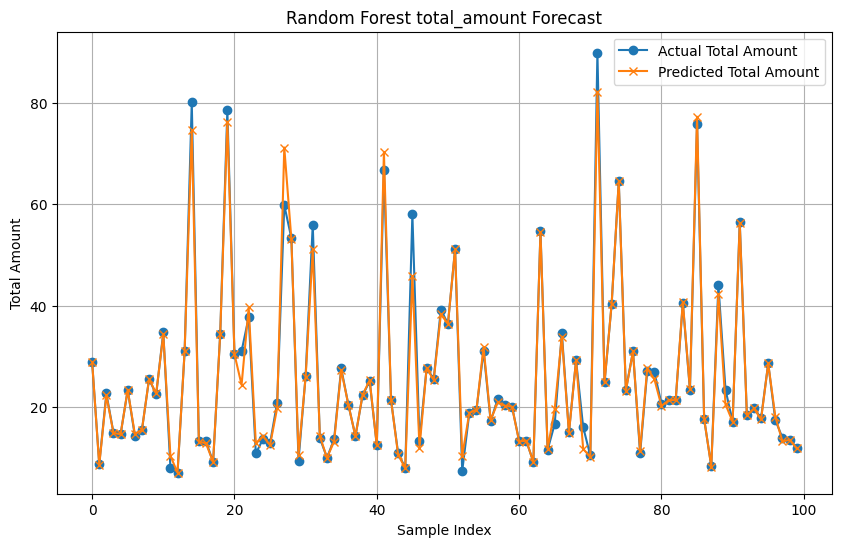

In [9]:
sample_size = 100

plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:sample_size], label='Actual Total Amount', marker='o')
plt.plot(y_pred[:sample_size], label='Predicted Total Amount', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Total Amount')
plt.title('Random Forest total_amount Forecast')
plt.legend()
plt.grid(True)
plt.show()